In [1]:
#!pip install --user uproot tqdm

In [2]:
username = "akapoor"

In [3]:
import getpass
import os
if os.system('klist | grep Default | grep ' + username + '@CERN.CH'):
    os.system('echo %s' % getpass.getpass() + " | kinit " + username)

In [4]:
root_files = '/eos/user/a/akapoor/SWAN_projects/electron_ntupleL.root'

In [5]:
import uproot
import glob
import pandas as pd
from tqdm import tqdm

f = uproot.open(root_files)
f.allkeys()

[b'ntuplizer;1', b'ntuplizer/tree;1']

In [6]:
unneccesary_columns = ['ele_index',
       'Spring16GPV1Vals', 'Spring16GPV1RawVals', 'Spring16HZZV1Vals',
       'Spring16HZZV1RawVals', 'Fall17NoIsoV2Vals',
       'Fall17IsoV2Vals', 'Fall17IsoV1Vals',
       'Fall17NoIsoV1Vals', 'Spring16GPV1wp80', 'Spring16GPV1wp90',
       'Spring16HZZV1wpLoose', 'Fall17noIsoV2wp80', 'Fall17noIsoV2wpLoose',
       'Fall17noIsoV2wp90', 'Fall17isoV2wpHZZ', 'Fall17isoV2wp80',
       'Fall17isoV2wp90', 'Fall17noIsoV1wp90',
       'Fall17noIsoV1wp80', 'Fall17noIsoV1wpLoose', 'Fall17isoV1wp90',
       'Fall17isoV1wp80', 'nEvent', 'nRun', 'nLumi']

def get_df(root_file_name):
    f = uproot.open(root_file_name)
    if len(f.allkeys()) == 0:
        return pd.DataFrame()
    df = uproot.open(root_file_name)["ntuplizer/tree"].pandas.df()
    return df.drop(unneccesary_columns, axis=1)



In [7]:
df = get_df(root_files)

In [8]:
df.columns

Index(['genNpu', 'vtxN', 'ele_q', 'ele_3q', 'ele_IsMvaIsolated',
       'ele_IsMvaNonIsolated', 'matchedToGenEle', 'rho', 'ele_pt',
       'ele_oldsigmaietaieta', 'ele_oldsigmaiphiiphi', 'ele_oldcircularity',
       'ele_oldr9', 'ele_scletawidth', 'ele_sclphiwidth', 'ele_hadronicOverEm',
       'ele_oldhe', 'ele_kfhits', 'ele_kfchi2', 'ele_gsfchi2', 'ele_fbrem',
       'ele_gsfhits', 'ele_expected_inner_hits',
       'ele_conversionVertexFitProbability', 'ele_ep', 'ele_eelepout',
       'ele_IoEmIop', 'ele_deltaetain', 'ele_deltaphiin', 'ele_deltaetaseed',
       'ele_psEoverEraw', 'ele_pfPhotonIso', 'ele_pfChargedHadIso',
       'ele_pfNeutralHadIso', 'scl_E', 'scl_Et', 'scl_eta', 'scl_phi',
       'ele_sclRawE', 'ele_sclNclus', 'ele_olde15', 'ele_olde25max',
       'ele_olde55', 'ele_ecalE', 'ele_ecalErr', 'ele_trackErr', 'ele_combErr',
       'ele_PFcombErr', 'ele_pfSumPUIso', 'ele_SCfbrem', 'ele_eClass',
       'ele_nbrem', 'ele_oldhebc', 'ele_hebc', 'ele_convDist', 'ele_convDcot',

In [9]:
import numpy as np

df = df.query("matchedToGenEle != 2")
df.loc[df["matchedToGenEle"] != 1, "matchedToGenEle"] = 0

df_barrel = df.query("abs(scl_eta) < 1.48")
df_endcap = df.query("abs(scl_eta) > 1.57")

df = df.query("abs(scl_eta) < 2.5")
df = df.query("ele_pt >= 0")

In [10]:
import matplotlib.pyplot as plt

def get_label(name):
    if name == 0:
        return "background"
    else:
        return "signal"

def plot_electrons(df, column, bins, logscale=False, ax=None, title=None, linestyle='-'):
    if ax is None:
        ax = plt.gca()
    for name, group in df.groupby("matchedToGenEle"):
        group[column].plot.hist(bins=bins, histtype="step", label=get_label(name), ax=ax,
                                density=True, linestyle=linestyle)
    ax.set_ylabel("density")
    ax.set_xlabel(column)
    ax.legend()
    ax.set_title(title)
    if logscale:
        ax.set_yscale("log", nonposy='clip')

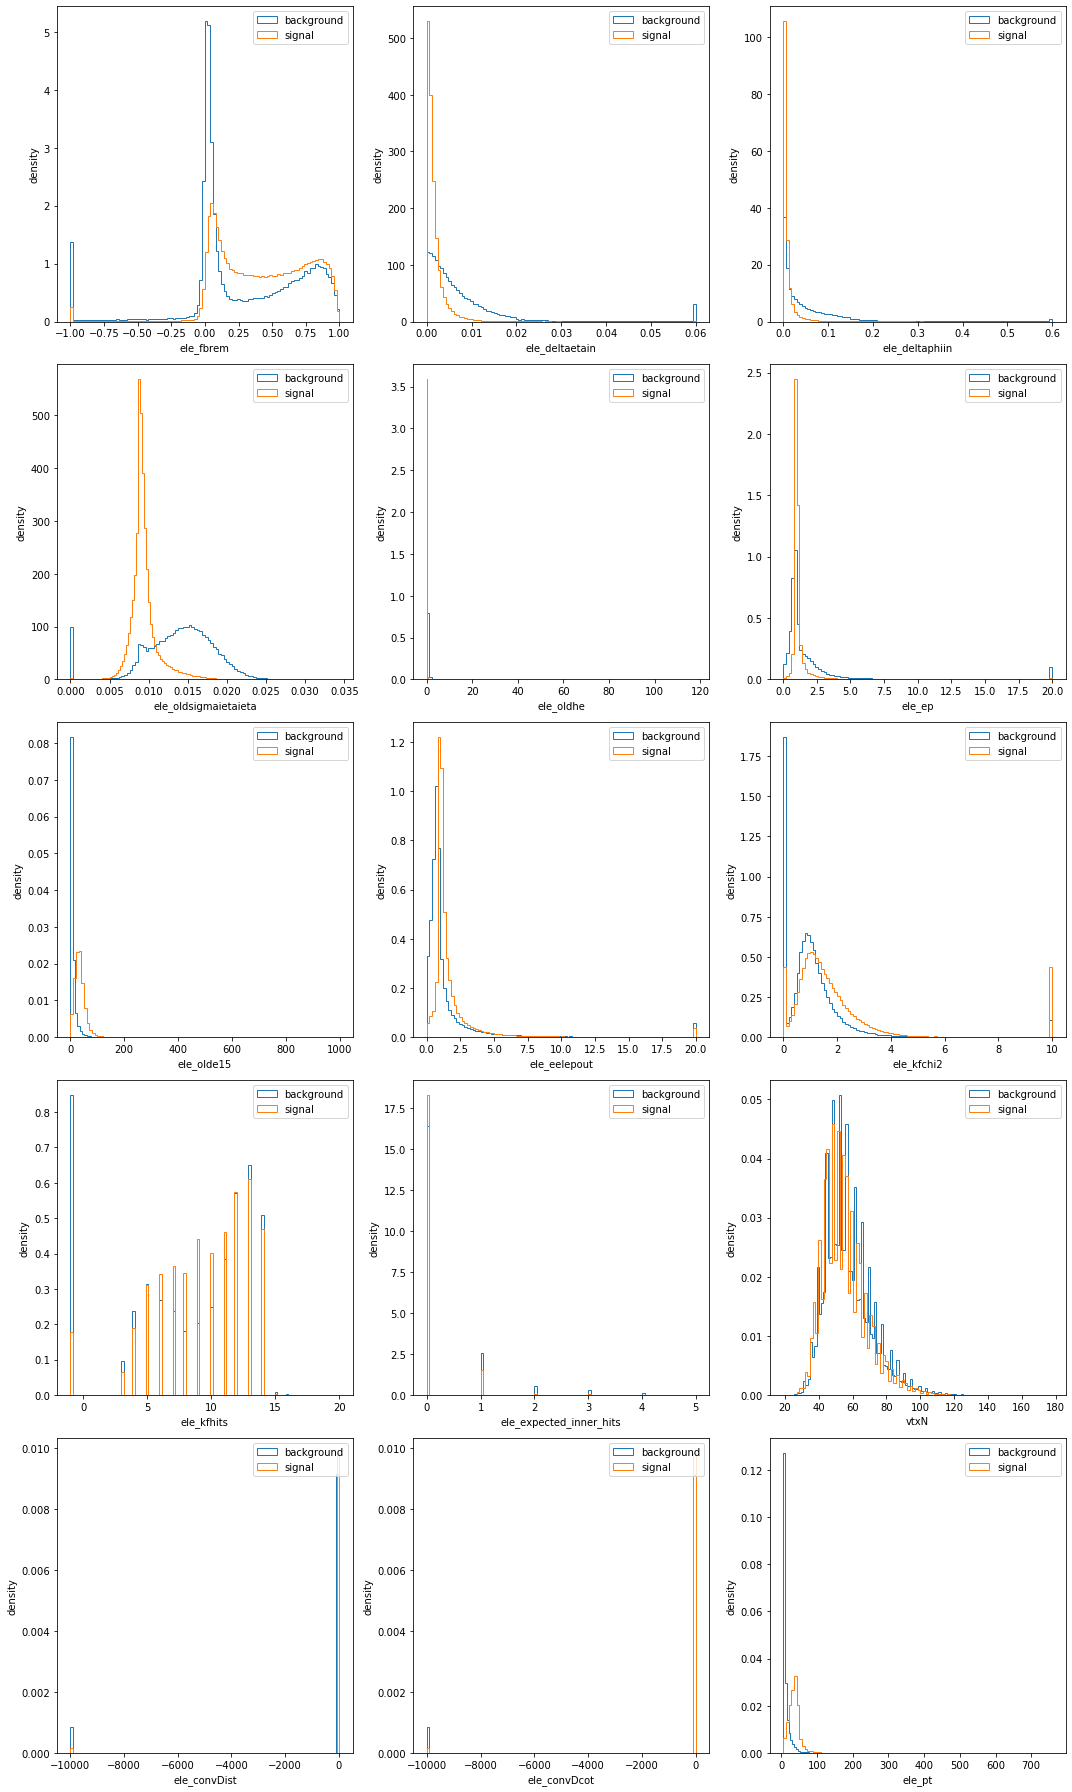

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))


#plot_electrons(df_barrel, "ele_fbrem", np.linspace(0, 100, 200), ax=axes[0,0])

plot_electrons(df_barrel, "ele_fbrem", 100, ax=axes[0,0])
plot_electrons(df_barrel, "ele_deltaetain", 100, ax=axes[0,1])
plot_electrons(df_barrel, "ele_deltaphiin", 100, ax=axes[0,2])

plot_electrons(df_barrel, "ele_oldsigmaietaieta", 100, ax=axes[1,0])
plot_electrons(df_barrel, "ele_oldhe", 100, ax=axes[1,1])
plot_electrons(df_barrel, "ele_ep", 100, ax=axes[1,2])

plot_electrons(df_barrel, "ele_olde15", 100, ax=axes[2,0])
plot_electrons(df_barrel, "ele_eelepout", 100, ax=axes[2,1])
plot_electrons(df_barrel, "ele_kfchi2", 100, ax=axes[2,2])

plot_electrons(df_barrel, "ele_kfhits", 100, ax=axes[3,0])
plot_electrons(df_barrel, "ele_expected_inner_hits", 100, ax=axes[3,1])
plot_electrons(df_barrel, "vtxN", 100, ax=axes[3,2])

plot_electrons(df_barrel, "ele_convDist", 100, ax=axes[4,0])
plot_electrons(df_barrel, "ele_convDcot", 100, ax=axes[4,1])
plot_electrons(df_barrel, "ele_pt", 100, ax=axes[4,2])


fig.tight_layout()
plt.show()

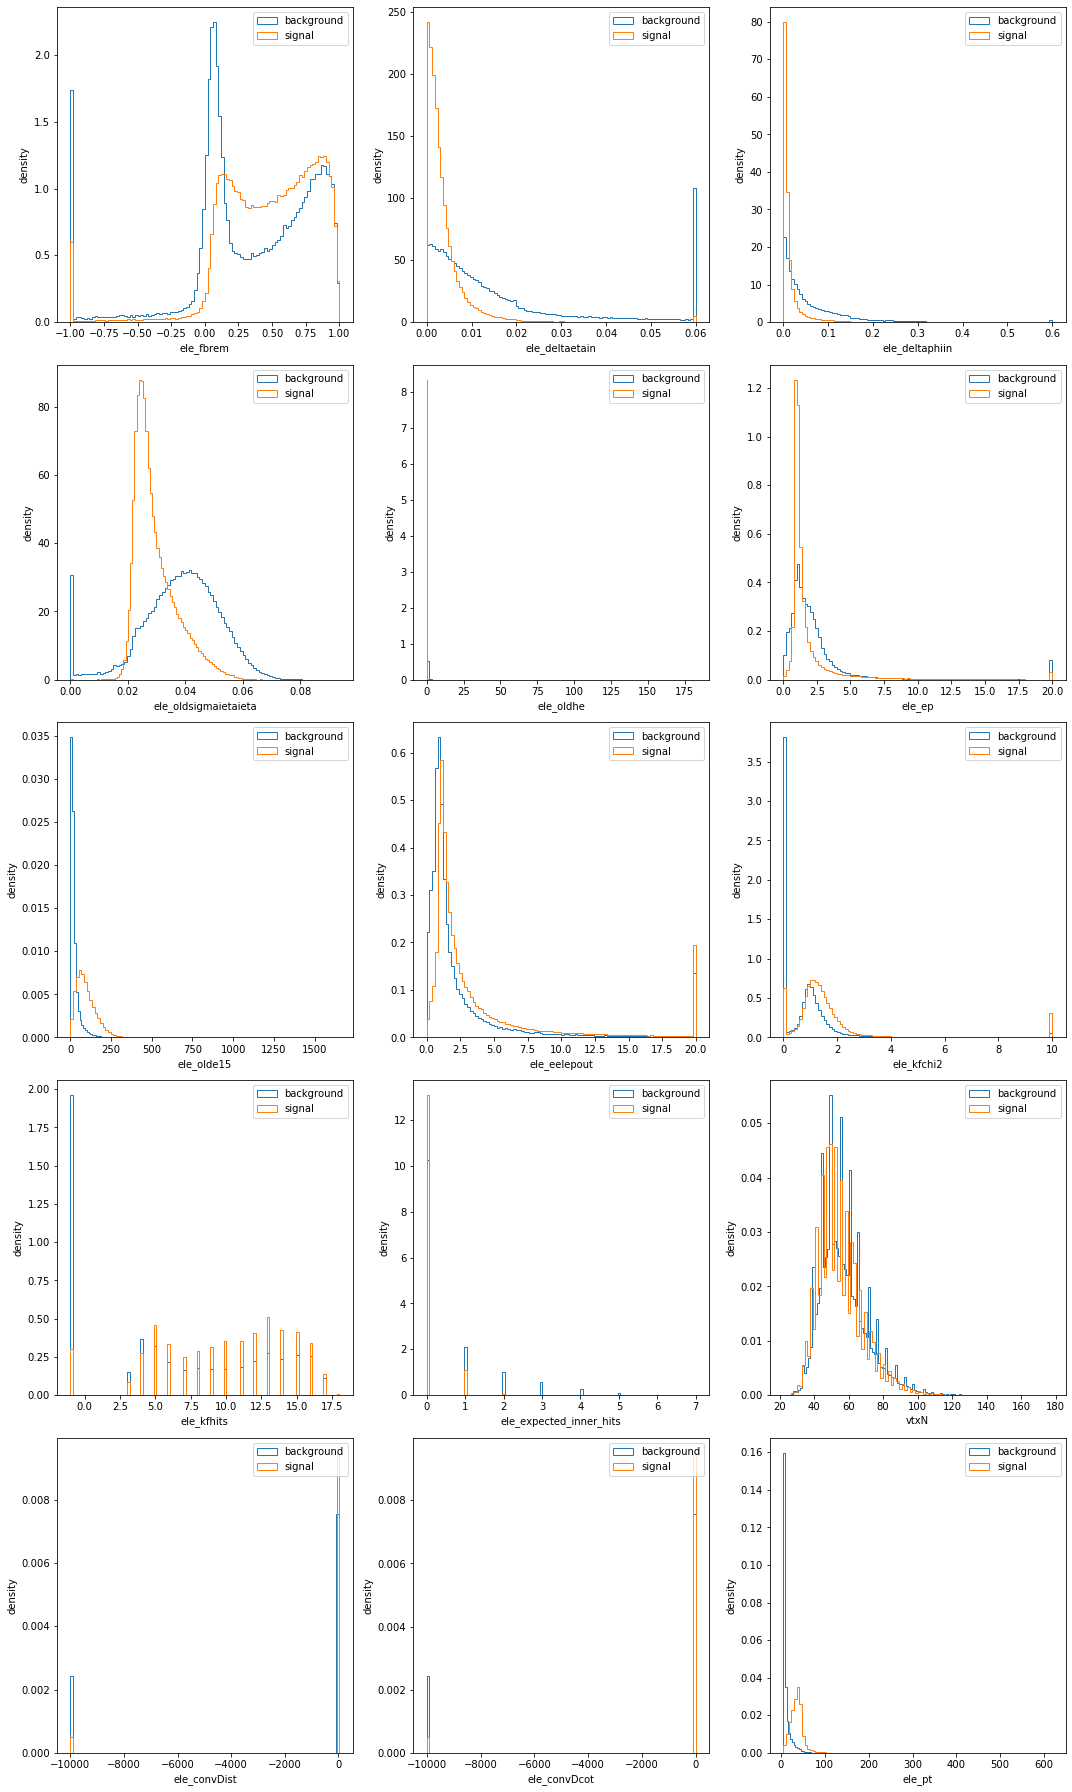

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
#plot_electrons(df_endcap, "ele_pt", np.linspace(0, 100, 200), ax=axes[0,0])
#plot_electrons(df_endcap, "scl_eta", np.linspace(-2.5, 2.5, 50), ax=axes[0,1])
#plot_electrons(df_endcap, "ele_IsMvaNonIsolated", np.linspace(-1, 1, 100), ax=axes[0,2])
#plot_electrons(df_endcap, "ele_convDist", np.linspace(-1, 1, 100), ax=axes[1,0])
#plot_electrons(df_endcap, "ele_convDcot", np.linspace(-1, 1, 100), ax=axes[1,1])
#plot_electrons(df_endcap, "ele_IsMvaIsolated", np.linspace(-1, 1, 100), ax=axes[1,2])


#plot_electrons(df_endcap, "ele_fbrem", np.linspace(0, 100, 200), ax=axes[0,0])

plot_electrons(df_endcap, "ele_fbrem", 100, ax=axes[0,0])
plot_electrons(df_endcap, "ele_deltaetain", 100, ax=axes[0,1])
plot_electrons(df_endcap, "ele_deltaphiin", 100, ax=axes[0,2])

plot_electrons(df_endcap, "ele_oldsigmaietaieta", 100, ax=axes[1,0])
plot_electrons(df_endcap, "ele_oldhe", 100, ax=axes[1,1])
plot_electrons(df_endcap, "ele_ep", 100, ax=axes[1,2])

plot_electrons(df_endcap, "ele_olde15", 100, ax=axes[2,0])
plot_electrons(df_endcap, "ele_eelepout", 100, ax=axes[2,1])
plot_electrons(df_endcap, "ele_kfchi2", 100, ax=axes[2,2])

plot_electrons(df_endcap, "ele_kfhits", 100, ax=axes[3,0])
plot_electrons(df_endcap, "ele_expected_inner_hits", 100, ax=axes[3,1])
plot_electrons(df_endcap, "vtxN", 100, ax=axes[3,2])

plot_electrons(df_endcap, "ele_convDist", 100, ax=axes[4,0])
plot_electrons(df_endcap, "ele_convDcot", 100, ax=axes[4,1])
plot_electrons(df_endcap, "ele_pt", 100, ax=axes[4,2])


fig.tight_layout()
plt.show()

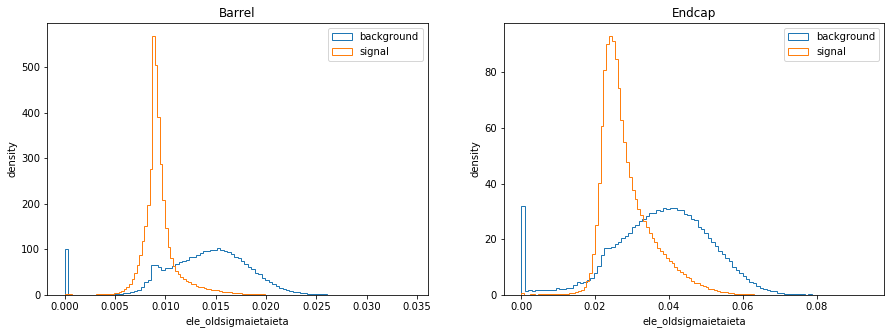

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_electrons(df.query("ele_isEB"), "ele_oldsigmaietaieta", 100, ax=axes[0], title="Barrel")
plot_electrons(df.query("ele_isEE"), "ele_oldsigmaietaieta", 100, ax=axes[1], title="Endcap")
plt.show()

In [14]:
features_barrel = ["ele_fbrem", "ele_deltaetain", "ele_deltaphiin", "ele_oldsigmaietaieta", 
                   "ele_oldhe", "ele_ep", "ele_olde15", "ele_eelepout",
                   "ele_kfchi2", "ele_kfhits", "ele_expected_inner_hits", "vtxN", "ele_convDist","ele_convDcot"]

features_endcap = features_barrel
from sklearn.model_selection import train_test_split
import xgboost as xgb
import xgboost2tmva

n_boost_rounds = 6
xgboost_params = {'eval_metric':'auc',
                  #'max_depth' : 4,
                  'objective'  :'binary:logitraw'}

category_titles = ["EB1_5", "EB2_5", "EE_5", "EB1_10", "EB2_10", "EE_10"]

In [15]:
from os import environ
os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow as tf
tf.random.set_random_seed(1)

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.compat.v2.keras.utils import multi_gpu_model
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from root_numpy import root2array, tree2array
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import argparse
import sys

for i, group_df in df.groupby("EleMVACats"):
    
    # As said before, let's skip the low-pt trainings
    #if i < 3:
    #    continue

    # get the category name
    category = category_titles[i]
    
    # get the features (either for endcap or barrel)
    features = features_endcap if "EE" in category else features_barrel
    
    # get the features and the target from the data frame
    X = group_df[features]
    y = group_df["matchedToGenEle"]

    # split X and y up in train and test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # Fortunately we are dealing with pandas DataFrames here, so we can just get the indices correspondng to the testing and training samples.
    # This will come in handy when we want to figure out which rows in the original dataframe where used for trainingand testing.
    idx_train = X_train.index
    idx_test = X_test.index

    # XGBoost has it's own data format, so we have to create these structures.
    # The copies have no specific purpose other than silencing an xgboost warning.
    dmatrix_train = xgb.DMatrix(X_train.copy(), label=np.copy(y_train))
    dmatrix_test  = xgb.DMatrix(X_test.copy(), label=np.copy(y_test ))

    # Get the number of positive and nevative training examples in this category
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train == 0)

    print(category + ":")
    print("training on {0} signal and {1} background electrons".format(n_pos, n_neg))

    # There is one additional hyperparameter that we have to set per catoegy: `scale_pos_weight`.
    # It corresponds  to a weight given to every positive sample, and it usually set to
    # n_neg / n_pos when you have imbalanced datasets to balance the total contributions
    # of the positive and negative classes in the loss function
    xgboost_params["scale_pos_weight"] = 1. * n_neg / n_pos

    # In this line, we actually train the model.
    # Notice the `early_stopping_rounds`, which cause the boosting to automatically stop
    # when the test AUC has not decreased for 10 rounds. How does xgboost know what the training set is?
    # You pass it some dmatrices with labels as a list of tuples to the `evals` keyword argument.
    # The last entry in this list will be used for the early stopping criterion, in our case `dmatrix_test`.
    model = xgb.train(xgboost_params,
                      dmatrix_train,
                      num_boost_round=n_boost_rounds,
                      evals= [(dmatrix_train, 'train'),
                              (dmatrix_test, 'test')],
                      early_stopping_rounds=10,
                      verbose_eval=False)
    
    # We want to know if and when the training was early stopped.
    # `best_iteration` counts the first iteration as zero, so we increment by one.
    best_iteration = model.best_iteration + 1
    if best_iteration < n_boost_rounds:
        print("early stopping after {0} boosting rounds".format(best_iteration))
    print("")
    
    # Just in case we want to later implement the BDTs in CMSSW, we use the xgboost2tmva script
    # to save the model as a TMVA compatible XML file.
    # Note that the XML will not be pretty, as everything is printed in one line.
    # You can use the commandline tool `xmllint` with the `--format` option if you want to make it pretty.
    xgboost2tmva.convert_model(model.get_dump(),
                               input_variables=[(f,'F') for f in features],
                               output_xml='electron_id_{0}.xml'.format(i))
    
    # If we want to load the model again with the xgboost library, we can't use the XML file.
    # Hence, we also save the model in xgboosts own binary format just to be sure.
    model.save_model("electron_id_{0}.bin".format(i))
    
    df.loc[idx_train, "score"] = model.predict(dmatrix_train)
    df.loc[idx_test, "score"] = model.predict(dmatrix_test)
    #########################
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)

    #y_train= to_categorical(y_trainN, num_classes=2)
    #y_test= to_categorical(y_testN, num_classes=2)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)

    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)


    #tensorboard_callback = TensorBoard(log_dir=f'LOGGY2/logdir_BS{BS}_EP{EP}_LR{LR}_LV{LV}_NN{NN}_GPU{GPU}_withAdj_v1')
    #tf.compat.v1.disable_eager_execution()
    #print("[INFO] training with {} GPUs...".format(GPU))

    Xdata=[X_train,X_test]
    ydata=[y_train,y_test]

    # Get the number of positive and nevative training examples in this category
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train == 0)

    print(category + ":")
    print("training DNN on {0} signal and {1} background electrons".format(n_pos, n_neg))

    # There is one additional hyperparameter that we have to set per catoegy: `scale_pos_weight`.
    # It corresponds  to a weight given to every positive sample, and it usually set to
    # n_neg / n_pos when you have imbalanced datasets to balance the total contributions
    # of the positive and negative classes in the loss function
    #xgboost_params["scale_pos_weight"] = 1. * n_neg / n_pos

    # In this line, we actually train the model.
    # Notice the `early_stopping_rounds`, which cause the boosting to automatically stop
    # when the test AUC has not decreased for 10 rounds. How does xgboost know what the training set is?
    # You pass it some dmatrices with labels as a list of tuples to the `evals` keyword argument.
    # The last entry in this list will be used for the early stopping criterion, in our case `dmatrix_test`.
    
    #modelDNN = Sequential()
    #modelDNN.add(Dense(32, kernel_initializer='glorot_normal', activation='relu', input_dim=14))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(16, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(8, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    #modelDNN.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    modelDNN = Sequential()
    modelDNN.add(Dense(28, kernel_initializer='glorot_normal', activation='relu', input_dim=14))
    #modelDNN.add(Dropout(0.1))
    modelDNN.add(Dense(28, kernel_initializer='glorot_normal', activation='relu'))
    #modelDNN.add(Dropout(0.1))
    modelDNN.add(Dense(28, kernel_initializer='glorot_normal', activation='relu'))
    modelDNN.add(Dropout(0.2))
    modelDNN.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    modelDNN.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy',])
    modelDNN.summary()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    train_history = modelDNN.fit(Xdata[0],ydata[0],
                              epochs=200,batch_size=1024,
                              validation_data=(Xdata[1],ydata[1]),verbose=1,
                              callbacks=[es])
        
    
    y_pred_test = modelDNN.predict(X_test)
    y_pred_train = modelDNN.predict(X_train)
    #########################

    # Now we see why it's good to have the indices corresponding to the train and test set!
    # We can now calculate classification scores with our freshly-trained model and store them
    # in a new column `score` of the original DataFrame at the appropriate places.
    
    df.loc[idx_train, "scoreDNN"] = modelDNN.predict(X_train)
    df.loc[idx_test, "scoreDNN"] = modelDNN.predict(X_test)
    
    # When we look at how the model performs later, we are mostly interested in the performance on the
    # test set. We can add another boolean column to indicate whether an electron is in the test set or not.
    df.loc[idx_train, "test"] = False
    df.loc[idx_test, "test"] = True

Welcome to JupyROOT 6.18/00
EB1_5:
training on 4140 signal and 29508 background electrons



W0804 23:05:15.541728 139918320949056 deprecation.py:506] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1288: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


EB1_5:
training DNN on 4140 signal and 29508 background electrons


W0804 23:05:15.792683 139918320949056 deprecation.py:323] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_2 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 29        
Total params: 2,073
Trainable params: 2,073
Non-trainable params: 0
_________________________________________________________________
Train on 33648 samples, validate on 16573 samples
Epoch 1/200
33648/33648 [==============================] - 0s 14us/sam

Epoch 52/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2584 - acc: 0.8944 - val_loss: 0.2641 - val_acc: 0.8962
Epoch 53/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2579 - acc: 0.8942 - val_loss: 0.2639 - val_acc: 0.8959
Epoch 54/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2570 - acc: 0.8943 - val_loss: 0.2636 - val_acc: 0.8959
Epoch 55/200
33648/33648 [==============================] - 0s 6us/sample - loss: 0.2572 - acc: 0.8951 - val_loss: 0.2633 - val_acc: 0.8961
Epoch 56/200
33648/33648 [==============================] - 0s 6us/sample - loss: 0.2568 - acc: 0.8943 - val_loss: 0.2632 - val_acc: 0.8960
Epoch 57/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2558 - acc: 0.8943 - val_loss: 0.2630 - val_acc: 0.8960
Epoch 58/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2554 - acc: 0.8955 - val_loss: 0.2627 - val_acc: 0.8959
Epoch 59/200
33648/3

33648/33648 [==============================] - 0s 4us/sample - loss: 0.2463 - acc: 0.8985 - val_loss: 0.2541 - val_acc: 0.8973
Epoch 111/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2453 - acc: 0.8990 - val_loss: 0.2540 - val_acc: 0.8972
Epoch 112/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2456 - acc: 0.8975 - val_loss: 0.2538 - val_acc: 0.8973
Epoch 113/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2441 - acc: 0.8982 - val_loss: 0.2537 - val_acc: 0.8973
Epoch 114/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2454 - acc: 0.8982 - val_loss: 0.2536 - val_acc: 0.8977
Epoch 115/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2442 - acc: 0.8988 - val_loss: 0.2534 - val_acc: 0.8977
Epoch 116/200
33648/33648 [==============================] - 0s 5us/sample - loss: 0.2450 - acc: 0.8985 - val_loss: 0.2534 - val_acc: 0.8974
Epoch 117/200
33648/33648 [

33648/33648 [==============================] - 0s 4us/sample - loss: 0.2382 - acc: 0.9007 - val_loss: 0.2480 - val_acc: 0.8980
Epoch 169/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2388 - acc: 0.8996 - val_loss: 0.2479 - val_acc: 0.8980
Epoch 170/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2385 - acc: 0.9007 - val_loss: 0.2478 - val_acc: 0.8979
Epoch 171/200
33648/33648 [==============================] - 0s 3us/sample - loss: 0.2376 - acc: 0.9006 - val_loss: 0.2477 - val_acc: 0.8980
Epoch 172/200
33648/33648 [==============================] - 0s 3us/sample - loss: 0.2374 - acc: 0.8996 - val_loss: 0.2477 - val_acc: 0.8978
Epoch 173/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2375 - acc: 0.9008 - val_loss: 0.2476 - val_acc: 0.8979
Epoch 174/200
33648/33648 [==============================] - 0s 4us/sample - loss: 0.2376 - acc: 0.9011 - val_loss: 0.2475 - val_acc: 0.8976
Epoch 175/200
33648/33648 [

Epoch 18/200
31956/31956 [==============================] - 0s 3us/sample - loss: 0.2683 - acc: 0.9045 - val_loss: 0.2710 - val_acc: 0.9015
Epoch 19/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2668 - acc: 0.9045 - val_loss: 0.2686 - val_acc: 0.9015
Epoch 20/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2645 - acc: 0.9045 - val_loss: 0.2664 - val_acc: 0.9015
Epoch 21/200
31956/31956 [==============================] - 0s 5us/sample - loss: 0.2613 - acc: 0.9045 - val_loss: 0.2644 - val_acc: 0.9015
Epoch 22/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2601 - acc: 0.9045 - val_loss: 0.2626 - val_acc: 0.9015
Epoch 23/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2578 - acc: 0.9045 - val_loss: 0.2609 - val_acc: 0.9015
Epoch 24/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2568 - acc: 0.9045 - val_loss: 0.2595 - val_acc: 0.9015
Epoch 25/200
31956/3

31956/31956 [==============================] - 0s 4us/sample - loss: 0.2283 - acc: 0.9095 - val_loss: 0.2362 - val_acc: 0.9071
Epoch 77/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2292 - acc: 0.9089 - val_loss: 0.2360 - val_acc: 0.9073
Epoch 78/200
31956/31956 [==============================] - 0s 3us/sample - loss: 0.2280 - acc: 0.9094 - val_loss: 0.2358 - val_acc: 0.9079
Epoch 79/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2279 - acc: 0.9095 - val_loss: 0.2355 - val_acc: 0.9081
Epoch 80/200
31956/31956 [==============================] - 0s 3us/sample - loss: 0.2272 - acc: 0.9096 - val_loss: 0.2353 - val_acc: 0.9084
Epoch 81/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2276 - acc: 0.9101 - val_loss: 0.2351 - val_acc: 0.9084
Epoch 82/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2264 - acc: 0.9106 - val_loss: 0.2349 - val_acc: 0.9088
Epoch 83/200
31956/31956 [=======

31956/31956 [==============================] - 0s 4us/sample - loss: 0.2161 - acc: 0.9150 - val_loss: 0.2270 - val_acc: 0.9107
Epoch 135/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2170 - acc: 0.9153 - val_loss: 0.2269 - val_acc: 0.9107
Epoch 136/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2157 - acc: 0.9154 - val_loss: 0.2269 - val_acc: 0.9107
Epoch 137/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2161 - acc: 0.9153 - val_loss: 0.2268 - val_acc: 0.9105
Epoch 138/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2168 - acc: 0.9152 - val_loss: 0.2266 - val_acc: 0.9105
Epoch 139/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2159 - acc: 0.9151 - val_loss: 0.2267 - val_acc: 0.9106
Epoch 140/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2158 - acc: 0.9145 - val_loss: 0.2266 - val_acc: 0.9106
Epoch 141/200
31956/31956 [

31956/31956 [==============================] - 0s 4us/sample - loss: 0.2100 - acc: 0.9172 - val_loss: 0.2234 - val_acc: 0.9110
Epoch 193/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2110 - acc: 0.9167 - val_loss: 0.2235 - val_acc: 0.9112
Epoch 194/200
31956/31956 [==============================] - 0s 3us/sample - loss: 0.2097 - acc: 0.9171 - val_loss: 0.2233 - val_acc: 0.9113
Epoch 195/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2091 - acc: 0.9164 - val_loss: 0.2233 - val_acc: 0.9114
Epoch 196/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2102 - acc: 0.9176 - val_loss: 0.2233 - val_acc: 0.9113
Epoch 197/200
31956/31956 [==============================] - 0s 3us/sample - loss: 0.2095 - acc: 0.9163 - val_loss: 0.2232 - val_acc: 0.9110
Epoch 198/200
31956/31956 [==============================] - 0s 4us/sample - loss: 0.2094 - acc: 0.9173 - val_loss: 0.2232 - val_acc: 0.9111
Epoch 199/200
31956/31956 [

65698/65698 [==============================] - 0s 4us/sample - loss: 0.1496 - acc: 0.9531 - val_loss: 0.1430 - val_acc: 0.9536
Epoch 43/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1490 - acc: 0.9532 - val_loss: 0.1425 - val_acc: 0.9536
Epoch 44/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1484 - acc: 0.9532 - val_loss: 0.1420 - val_acc: 0.9536
Epoch 45/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1481 - acc: 0.9532 - val_loss: 0.1415 - val_acc: 0.9537
Epoch 46/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1473 - acc: 0.9531 - val_loss: 0.1411 - val_acc: 0.9538
Epoch 47/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1473 - acc: 0.9532 - val_loss: 0.1406 - val_acc: 0.9538
Epoch 48/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1462 - acc: 0.9533 - val_loss: 0.1401 - val_acc: 0.9538
Epoch 49/200
65698/65698 [=======

65698/65698 [==============================] - 0s 4us/sample - loss: 0.1347 - acc: 0.9537 - val_loss: 0.1298 - val_acc: 0.9548
Epoch 101/200
65698/65698 [==============================] - 0s 3us/sample - loss: 0.1346 - acc: 0.9540 - val_loss: 0.1297 - val_acc: 0.9549
Epoch 102/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1341 - acc: 0.9538 - val_loss: 0.1296 - val_acc: 0.9549
Epoch 103/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1342 - acc: 0.9540 - val_loss: 0.1295 - val_acc: 0.9549
Epoch 104/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1342 - acc: 0.9542 - val_loss: 0.1295 - val_acc: 0.9550
Epoch 105/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1339 - acc: 0.9541 - val_loss: 0.1294 - val_acc: 0.9549
Epoch 106/200
65698/65698 [==============================] - 0s 4us/sample - loss: 0.1341 - acc: 0.9541 - val_loss: 0.1293 - val_acc: 0.9550
Epoch 107/200
65698/65698 [

65698/65698 [==============================] - 0s 7us/sample - loss: 0.1299 - acc: 0.9551 - val_loss: 0.1261 - val_acc: 0.9573
Epoch 159/200
65698/65698 [==============================] - 0s 5us/sample - loss: 0.1301 - acc: 0.9550 - val_loss: 0.1260 - val_acc: 0.9571
Epoch 160/200
65698/65698 [==============================] - 0s 5us/sample - loss: 0.1301 - acc: 0.9551 - val_loss: 0.1260 - val_acc: 0.9572
Epoch 161/200
65698/65698 [==============================] - 0s 5us/sample - loss: 0.1302 - acc: 0.9547 - val_loss: 0.1259 - val_acc: 0.9573
Epoch 162/200
65698/65698 [==============================] - 0s 5us/sample - loss: 0.1297 - acc: 0.9552 - val_loss: 0.1259 - val_acc: 0.9572
Epoch 163/200
65698/65698 [==============================] - 0s 6us/sample - loss: 0.1304 - acc: 0.9551 - val_loss: 0.1258 - val_acc: 0.9573
Epoch 164/200
65698/65698 [==============================] - 0s 5us/sample - loss: 0.1300 - acc: 0.9550 - val_loss: 0.1258 - val_acc: 0.9574
Epoch 165/200
65698/65698 [

Epoch 8/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1355 - acc: 0.9524 - val_loss: 0.1304 - val_acc: 0.9527
Epoch 9/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1322 - acc: 0.9528 - val_loss: 0.1276 - val_acc: 0.9535
Epoch 10/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1290 - acc: 0.9539 - val_loss: 0.1255 - val_acc: 0.9539
Epoch 11/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1267 - acc: 0.9544 - val_loss: 0.1236 - val_acc: 0.9548
Epoch 12/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1243 - acc: 0.9553 - val_loss: 0.1218 - val_acc: 0.9555
Epoch 13/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1232 - acc: 0.9556 - val_loss: 0.1202 - val_acc: 0.9560
Epoch 14/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.1213 - acc: 0.9564 - val_loss: 0.1188 - val_acc: 0.9564
Epoch 15

Epoch 66/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0933 - acc: 0.9659 - val_loss: 0.0950 - val_acc: 0.9649
Epoch 67/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0929 - acc: 0.9659 - val_loss: 0.0949 - val_acc: 0.9650
Epoch 68/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0930 - acc: 0.9661 - val_loss: 0.0947 - val_acc: 0.9651
Epoch 69/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0928 - acc: 0.9659 - val_loss: 0.0944 - val_acc: 0.9650
Epoch 70/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0923 - acc: 0.9663 - val_loss: 0.0941 - val_acc: 0.9653
Epoch 71/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0924 - acc: 0.9663 - val_loss: 0.0940 - val_acc: 0.9653
Epoch 72/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0920 - acc: 0.9665 - val_loss: 0.0937 - val_acc: 0.9654
Epoch 

171631/171631 [==============================] - 1s 4us/sample - loss: 0.0847 - acc: 0.9701 - val_loss: 0.0871 - val_acc: 0.9692
Epoch 124/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0845 - acc: 0.9699 - val_loss: 0.0870 - val_acc: 0.9692
Epoch 125/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0846 - acc: 0.9700 - val_loss: 0.0869 - val_acc: 0.9694
Epoch 126/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0846 - acc: 0.9700 - val_loss: 0.0868 - val_acc: 0.9694
Epoch 127/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0843 - acc: 0.9702 - val_loss: 0.0868 - val_acc: 0.9695
Epoch 128/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0842 - acc: 0.9703 - val_loss: 0.0868 - val_acc: 0.9695
Epoch 129/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0841 - acc: 0.9703 - val_loss: 0.0867 - val_acc: 0.9696
Epoch 130/200

171631/171631 [==============================] - 1s 4us/sample - loss: 0.0815 - acc: 0.9713 - val_loss: 0.0847 - val_acc: 0.9706
Epoch 181/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0816 - acc: 0.9713 - val_loss: 0.0847 - val_acc: 0.9705
Epoch 182/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0816 - acc: 0.9711 - val_loss: 0.0847 - val_acc: 0.9706
Epoch 183/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0813 - acc: 0.9714 - val_loss: 0.0846 - val_acc: 0.9706
Epoch 184/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0816 - acc: 0.9712 - val_loss: 0.0845 - val_acc: 0.9705
Epoch 185/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0813 - acc: 0.9715 - val_loss: 0.0846 - val_acc: 0.9705
Epoch 186/200
171631/171631 [==============================] - 1s 4us/sample - loss: 0.0812 - acc: 0.9711 - val_loss: 0.0846 - val_acc: 0.9707
Epoch 187/200

140933/140933 [==============================] - 1s 4us/sample - loss: 0.1362 - acc: 0.9490 - val_loss: 0.1323 - val_acc: 0.9501
Epoch 30/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1360 - acc: 0.9491 - val_loss: 0.1319 - val_acc: 0.9502
Epoch 31/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1353 - acc: 0.9492 - val_loss: 0.1316 - val_acc: 0.9501
Epoch 32/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1348 - acc: 0.9494 - val_loss: 0.1312 - val_acc: 0.9502
Epoch 33/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1341 - acc: 0.9498 - val_loss: 0.1309 - val_acc: 0.9503
Epoch 34/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1338 - acc: 0.9498 - val_loss: 0.1306 - val_acc: 0.9503
Epoch 35/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1332 - acc: 0.9501 - val_loss: 0.1303 - val_acc: 0.9503
Epoch 36/200
140933

Epoch 87/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1247 - acc: 0.9532 - val_loss: 0.1220 - val_acc: 0.9528
Epoch 88/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1244 - acc: 0.9535 - val_loss: 0.1219 - val_acc: 0.9529
Epoch 89/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1241 - acc: 0.9533 - val_loss: 0.1218 - val_acc: 0.9530
Epoch 90/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1235 - acc: 0.9537 - val_loss: 0.1218 - val_acc: 0.9534
Epoch 91/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1239 - acc: 0.9533 - val_loss: 0.1216 - val_acc: 0.9531
Epoch 92/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1238 - acc: 0.9532 - val_loss: 0.1215 - val_acc: 0.9530
Epoch 93/200
140933/140933 [==============================] - 1s 5us/sample - loss: 0.1236 - acc: 0.9537 - val_loss: 0.1214 - val_acc: 0.9532
Epoch 

140933/140933 [==============================] - 1s 4us/sample - loss: 0.1195 - acc: 0.9553 - val_loss: 0.1177 - val_acc: 0.9552
Epoch 145/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1198 - acc: 0.9554 - val_loss: 0.1176 - val_acc: 0.9553
Epoch 146/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1194 - acc: 0.9553 - val_loss: 0.1176 - val_acc: 0.9553
Epoch 147/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1194 - acc: 0.9553 - val_loss: 0.1176 - val_acc: 0.9554
Epoch 148/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1194 - acc: 0.9553 - val_loss: 0.1174 - val_acc: 0.9553
Epoch 149/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1197 - acc: 0.9555 - val_loss: 0.1174 - val_acc: 0.9553
Epoch 150/200
140933/140933 [==============================] - 1s 4us/sample - loss: 0.1194 - acc: 0.9555 - val_loss: 0.1174 - val_acc: 0.9556
Epoch 151/200


EE_10:
training DNN on 158045 signal and 28137 background electrons
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 28)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_22 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 29        
Total params: 2,073
Trainable params: 2,073
Non-trainable params: 0
_________________________________________________________________
Train on 186182 samples, validate on 91702 sample

Epoch 51/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1752 - acc: 0.9309 - val_loss: 0.1727 - val_acc: 0.9309
Epoch 52/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1749 - acc: 0.9309 - val_loss: 0.1725 - val_acc: 0.9308
Epoch 53/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1748 - acc: 0.9309 - val_loss: 0.1724 - val_acc: 0.9309
Epoch 54/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1743 - acc: 0.9309 - val_loss: 0.1722 - val_acc: 0.9310
Epoch 55/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1740 - acc: 0.9310 - val_loss: 0.1720 - val_acc: 0.9310
Epoch 56/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1737 - acc: 0.9310 - val_loss: 0.1718 - val_acc: 0.9312
Epoch 57/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1737 - acc: 0.9311 - val_loss: 0.1717 - val_acc: 0.9315
Epoch 

186182/186182 [==============================] - 1s 4us/sample - loss: 0.1674 - acc: 0.9347 - val_loss: 0.1671 - val_acc: 0.9335
Epoch 109/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1672 - acc: 0.9342 - val_loss: 0.1671 - val_acc: 0.9333
Epoch 110/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1670 - acc: 0.9346 - val_loss: 0.1671 - val_acc: 0.9334
Epoch 111/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1670 - acc: 0.9344 - val_loss: 0.1669 - val_acc: 0.9335
Epoch 112/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1668 - acc: 0.9347 - val_loss: 0.1669 - val_acc: 0.9335
Epoch 113/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1668 - acc: 0.9346 - val_loss: 0.1669 - val_acc: 0.9334
Epoch 114/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1669 - acc: 0.9346 - val_loss: 0.1669 - val_acc: 0.9334
Epoch 115/200

186182/186182 [==============================] - 1s 4us/sample - loss: 0.1644 - acc: 0.9359 - val_loss: 0.1654 - val_acc: 0.9345
Epoch 166/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1644 - acc: 0.9359 - val_loss: 0.1654 - val_acc: 0.9339
Epoch 167/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1641 - acc: 0.9360 - val_loss: 0.1653 - val_acc: 0.9342
Epoch 168/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1640 - acc: 0.9361 - val_loss: 0.1653 - val_acc: 0.9345
Epoch 169/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1642 - acc: 0.9360 - val_loss: 0.1653 - val_acc: 0.9342
Epoch 170/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1642 - acc: 0.9358 - val_loss: 0.1653 - val_acc: 0.9343
Epoch 171/200
186182/186182 [==============================] - 1s 4us/sample - loss: 0.1643 - acc: 0.9359 - val_loss: 0.1653 - val_acc: 0.9346
Epoch 172/200

In [16]:
from sklearn import metrics

def plot_roc_curve(df, score_column, tpr_threshold=0, ax=None, color=None, linestyle='-', label=None):
    if ax is None:
        ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    if label is None:
        label = score_column
    fpr, tpr, thresholds = metrics.roc_curve(df["matchedToGenEle"], df[score_column])
    mask = tpr > tpr_threshold
    fpr, tpr = fpr[mask], tpr[mask]
    auc=metrics.auc(fpr, tpr)
    label=label+' auc='+str(round(auc*100,1))+'%'
    ax.plot(tpr, fpr, label=label, color=color, linestyle=linestyle)
    return auc

def plot_single_roc_point(df, var='Fall17isoV1wpLoose', ax=None , marker='o', markersize=6, color="red",label=''):
    
    backgroundpass=np.sum((df[var] == 1) & (df['matchedToGenEle'] == 0))
    backgroundrej=np.sum((df[var] == 0) & (df['matchedToGenEle'] == 0))
    signalpass=np.sum((df[var] == 1) & (df['matchedToGenEle'] == 1))
    signalrej=np.sum((df[var] == 0) & (df['matchedToGenEle'] == 1))
    backgroundrej=backgroundrej/(backgroundpass+backgroundrej)
    signaleff=signalpass/(signalpass+signalrej)
    ax.plot([signaleff], [1-backgroundrej], marker=marker, markersize=markersize, color=color)
    ax.annotate(label, (signaleff, 1-backgroundrej))
    #ax.plot((0,signaleff), (backgroundrej, backgroundrej), 'k--', alpha=0.3)
    #ax.plot((signaleff,signaleff), (0, backgroundrej), 'k--',alpha=0.3)
    ax.plot((0,1), (1-backgroundrej, 1-backgroundrej), 'k--', alpha=0.2)
    ax.plot((signaleff,signaleff), (0, 1), 'k--',alpha=0.2)
    
def plot_single_roc_point2(df, var='score', val='0', ax=None , marker='o', markersize=6, color="red",label=''):
    
    backgroundpass=np.sum((df[var] >val) & (df['matchedToGenEle'] == 0))
    backgroundrej=np.sum((df[var] <val) & (df['matchedToGenEle'] == 0))
    signalpass=np.sum((df[var] >val) & (df['matchedToGenEle'] == 1))
    signalrej=np.sum((df[var] <val) & (df['matchedToGenEle'] == 1))
    backgroundrej=backgroundrej/(backgroundpass+backgroundrej)
    signaleff=signalpass/(signalpass+signalrej)
    ax.plot([signaleff], [1-backgroundrej], marker=marker, markersize=markersize, color=color)
    ax.annotate(label, (signaleff, 1-backgroundrej))
    ax.plot((0,1), (1-backgroundrej, 1-backgroundrej), 'k--', alpha=0.2)
    ax.plot((signaleff,signaleff), (0, 1), 'k--',alpha=0.2)

0
EB1_5
-0.1875
auc_test=0.9043520762483617
auc_train=0.9309789443819051
auc_testDNN=0.8928693196782461
auc_trainDNN=0.9060020569219253
auc_mvaiso=0.784577883694778
1
EB2_5
-0.1875
auc_test=0.8844233103730477
auc_train=0.9256638866128899
auc_testDNN=0.8780752233512925
auc_trainDNN=0.8954273892551295
auc_mvaiso=0.7749981990811632
2


/usr/local/bin/start_ipykernel.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


EE_5
-0.1075
auc_test=0.8986605039158682
auc_train=0.9186958722375643
auc_testDNN=0.9009675954280801
auc_trainDNN=0.9027398569077708
auc_mvaiso=0.7972659704345351
3
EB1_10
-0.1875
auc_test=0.9786326601020032
auc_train=0.9831433108450447
auc_testDNN=0.9830520729479334
auc_trainDNN=0.9858456529789825
auc_mvaiso=0.9366427197636167
4
EB2_10
-0.1875
auc_test=0.9698088897312239
auc_train=0.9731178889048793
auc_testDNN=0.9760266636642535
auc_trainDNN=0.9768753805336394
auc_mvaiso=0.9280102770662816
5
EE_10
-0.1075
auc_test=0.9540486983904727
auc_train=0.9588326709169439
auc_testDNN=0.9630068022565752
auc_trainDNN=0.965053508089697
auc_mvaiso=0.9168508376595526


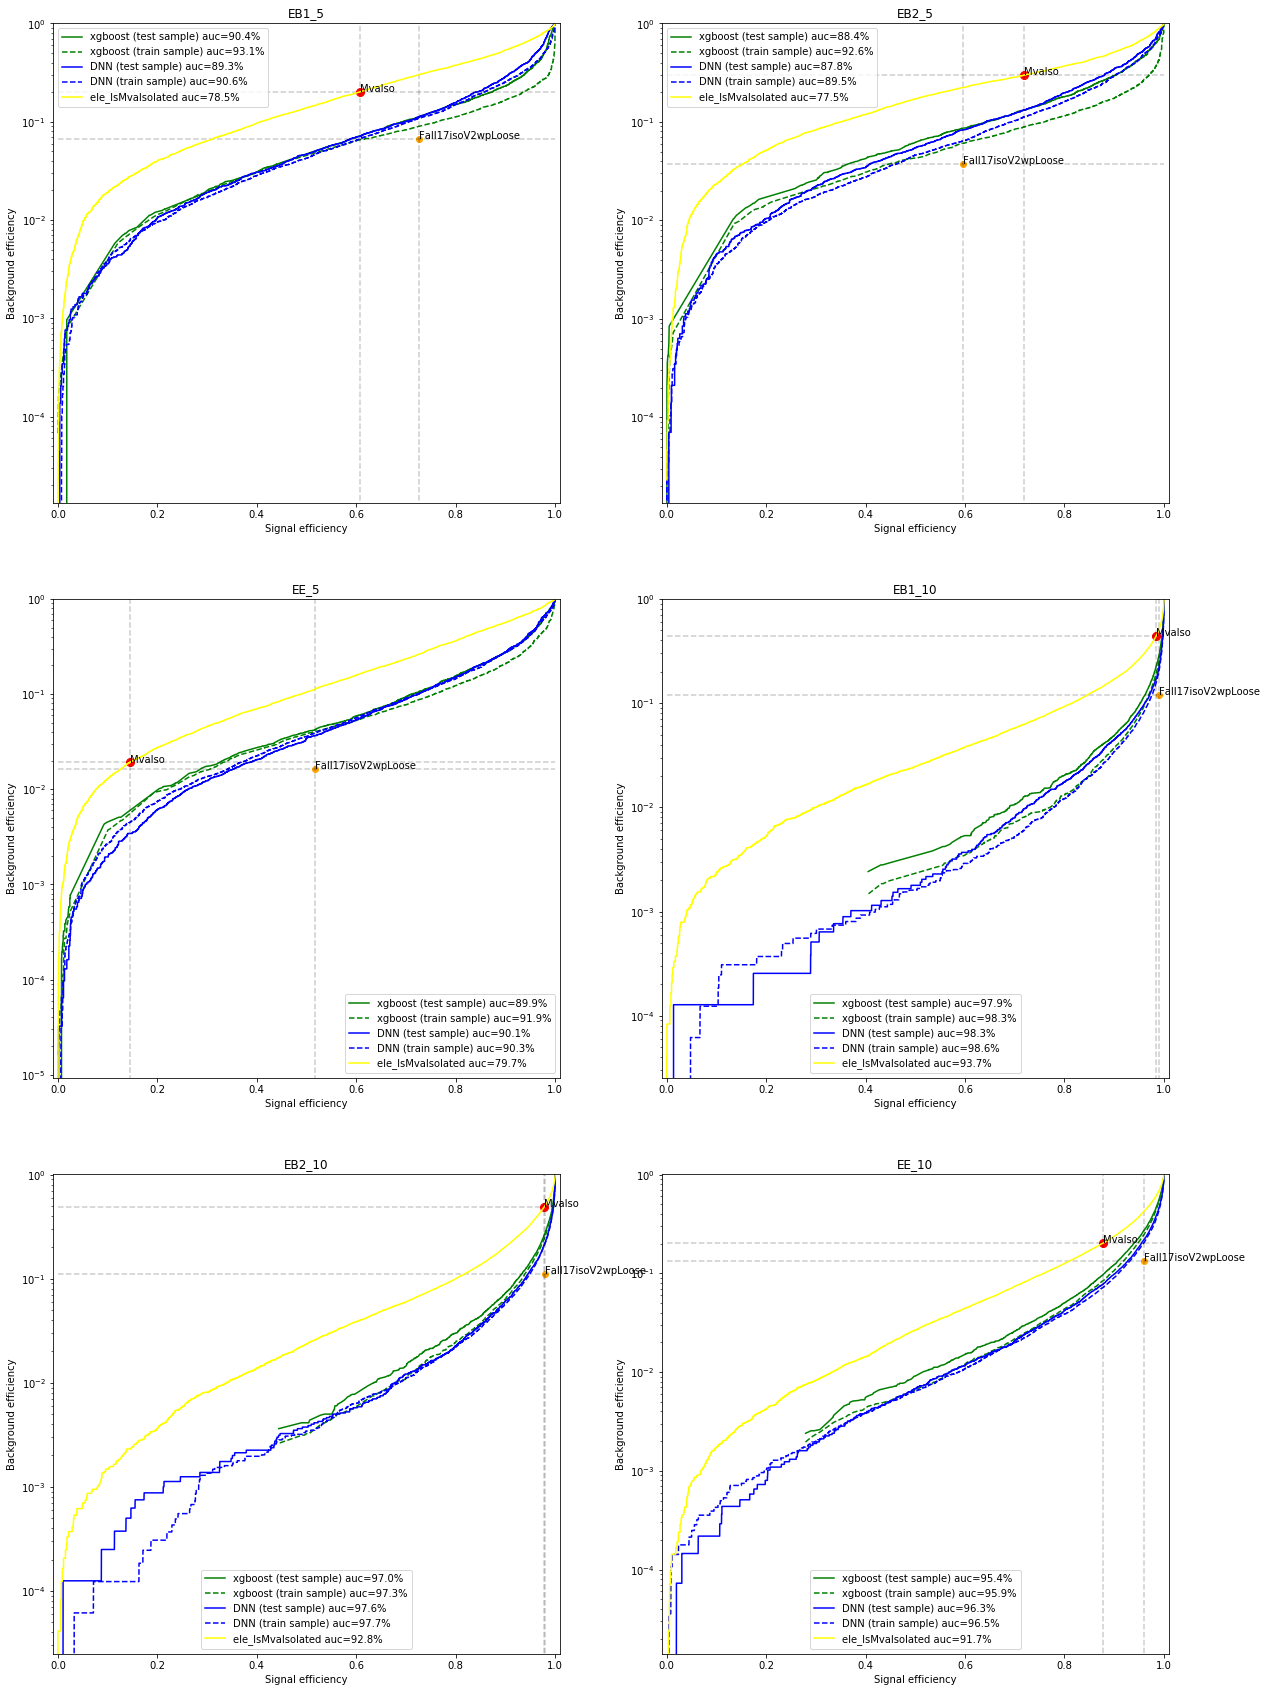

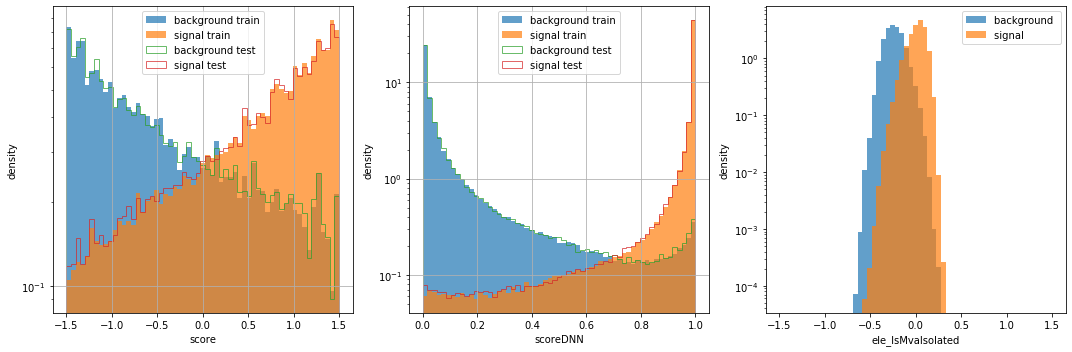

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
for i, df_group in df.groupby("EleMVACats"):
    print(i)
    #if i < 0:
     #   continue
    
    df_train = df_group.query("not test")
    df_test = df_group.query("test")
    
    df.columns
    
    if i==0:
        ax = axes[0,0]
        val = -0.1875
    elif i==1:
        ax = axes[0,1]
        val = -0.1875
    elif i==2:
        ax = axes[1,0]
        val = -0.1075
    elif i==3:
        ax = axes[1,1]
        val = -0.1875
    elif i==4:
        ax = axes[2,0]
        val = -0.1875
    elif i==5:
        ax = axes[2,1]
        val = -0.1075
    
    #ax.grid()
    
    auc_test=plot_roc_curve(df_test, "score", ax=ax,color="green", label="xgboost (test sample)")
    auc_train=plot_roc_curve(df_train, "score", ax=ax, color="green", linestyle='--', label="xgboost (train sample)")
    #plot_roc_curve(df_test, "ele_IsMvaNonIsolated", ax=ax)
    auc_testDNN=plot_roc_curve(df_test, "scoreDNN", ax=ax,color="blue", label="DNN (test sample)")
    auc_trainDNN=plot_roc_curve(df_train, "scoreDNN", ax=ax, color="blue", linestyle='--', label="DNN (train sample)")
    #plot_single_roc_point(df_test, var='Fall17isoV1wpLoose', color="yellow", ax=ax)
    #plot_single_roc_point(df, var='Fall17isoV1wpLoose', ax=ax , marker='o', markersize=6, color="red",label='Fall17isoV1wpLoose')
    plot_single_roc_point(df_group, var='Fall17isoV2wpLoose', ax=ax , marker='o', markersize=6, color="orange",label='Fall17isoV2wpLoose')
    plot_single_roc_point2(df_group, var='ele_IsMvaIsolated', val=val, ax=ax , marker='o', markersize=8, color="red",label='MvaIso')
    auc_mvaiso=plot_roc_curve(df_group, "ele_IsMvaIsolated", color="yellow", ax=ax)
    
    ax.set_title(category_titles[i])
    ax.legend()
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
    ax.set_xlim(-0.01, 1.01)
    ax.set_ylim(-0.01, 1.01)
    
    print(category_titles[i])
    print(val)
    print(f'auc_test={auc_test}')
    print(f'auc_train={auc_train}')
    print(f'auc_testDNN={auc_testDNN}')
    print(f'auc_trainDNN={auc_trainDNN}')
    print(f'auc_mvaiso={auc_mvaiso}')
    #print(f'auc_mvanoniso={auc_mvanoniso}')
fig.savefig('roc.pdf')  
plt.show()


def plot_mva(df, column, bins, logscale=False, ax=None, title=None, ls='dashed', alpha=0.5, sample=''):
    if sample is '' or sample is 'train':
        histtype="bar"
    if sample is 'test':
        histtype="step"
        
    if ax is None:
        ax = plt.gca()
    for name, group in df.groupby("matchedToGenEle"):
        group[column].hist(bins=bins, histtype=histtype, alpha=0.7,
                           label=get_label(name)+' '+sample, ax=ax, density=True, ls=ls)
    ax.set_ylabel("density")
    ax.set_xlabel(column)
    ax.legend()
    ax.set_title(title)
    #if logscale:
    ax.set_yscale("log", nonposy='clip')

fig, axes3 = plt.subplots(1, 3, figsize=(15, 5))

df_train = df.query("not test")
df_test = df.query("test")
plot_mva(df_train, "score", np.linspace(-1.5, 1.5, 60), ls='dotted', ax=axes3[0],sample='train')
plot_mva(df_test, "score", np.linspace(-1.5, 1.5, 60), ls='solid', ax=axes3[0], sample='test')

plot_mva(df_train, "scoreDNN", np.linspace(0, 1, 60), ls='dotted', ax=axes3[1],sample='train')
plot_mva(df_test, "scoreDNN", np.linspace(0, 1, 60), ls='solid', ax=axes3[1], sample='test')

plot_mva(df, "ele_IsMvaIsolated", np.linspace(-1.5, 1.5, 60), ls='solid', ax=axes3[2],sample='')
#plot_mva(df, "ele_IsMvaIsolated", np.linspace(-2, 2, 40), ls='solid', ax=axes3[1], sample='test')

#plot_electrons(df_train, "score", np.linspace(-10, 10, 100), ax=axes[0,1])

fig.tight_layout()
plt.grid()
plt.show()

0
EB1_5
-0.1875
1
EB2_5
-0.1875
2
EE_5
-0.1075
3
EB1_10
-0.1875
4
EB2_10
-0.1875
5
EE_10
-0.1075


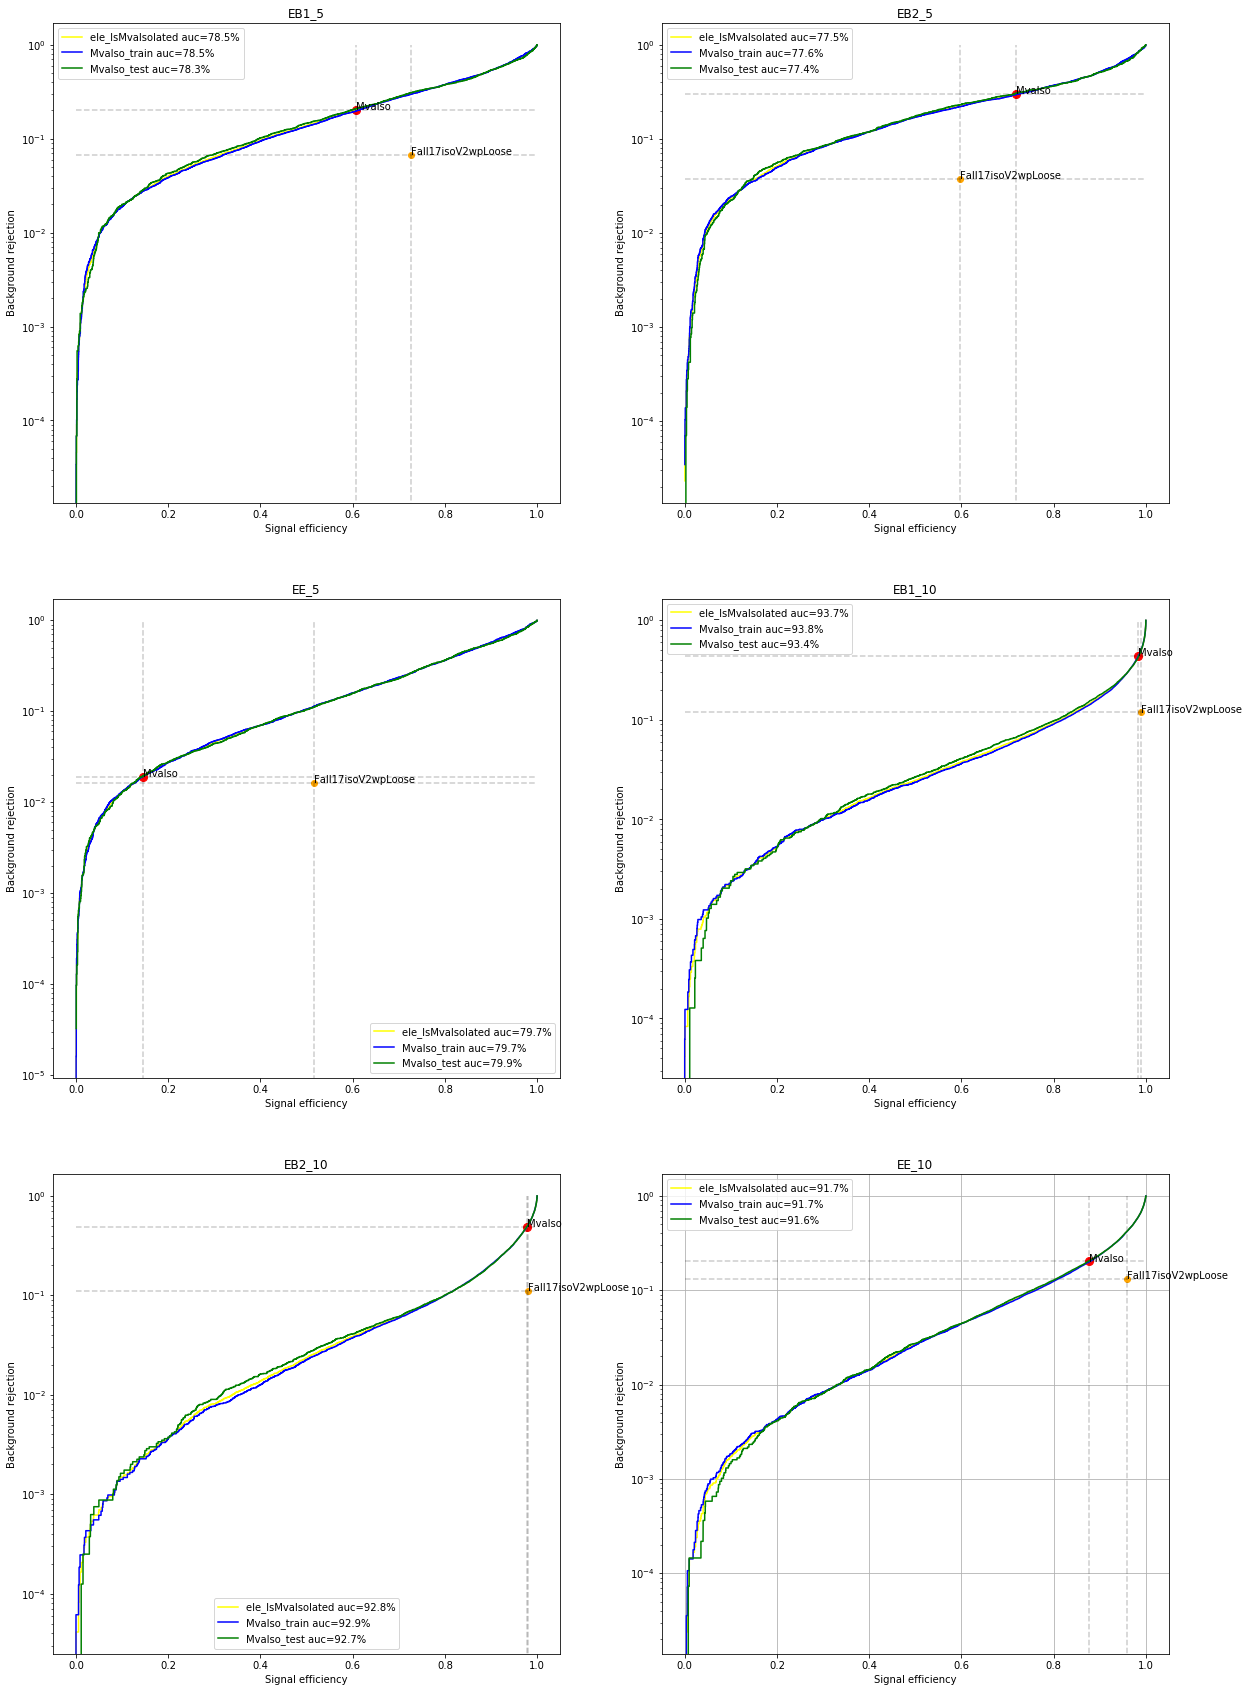

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

for i, df_group in df.groupby("EleMVACats"):
    print(i)
    #if i < 0:
     #   continue
    
    df_train = df_group.query("not test")
    df_test = df_group.query("test")
    
    df.columns
    
    if i==0:
        ax = axes[0,0]
        val = -0.1875
    elif i==1:
        ax = axes[0,1]
        val = -0.1875
    elif i==2:
        ax = axes[1,0]
        val = -0.1075
    elif i==3:
        ax = axes[1,1]
        val = -0.1875
    elif i==4:
        ax = axes[2,0]
        val = -0.1875
    elif i==5:
        ax = axes[2,1]
        val = -0.1075
    
    plot_single_roc_point(df_group, var='Fall17isoV2wpLoose', ax=ax , marker='o', markersize=6, color="orange",label='Fall17isoV2wpLoose')
    plot_single_roc_point2(df_group, var='ele_IsMvaIsolated', val=val, ax=ax , marker='o', markersize=8, color="red",label='MvaIso')
    auc_mvaiso=plot_roc_curve(df_group, "ele_IsMvaIsolated", color="yellow", ax=ax)
    auc_mvaiso=plot_roc_curve(df_train, "ele_IsMvaIsolated", color="blue", ax=ax,label='MvaIso_train')
    auc_mvaiso=plot_roc_curve(df_test, "ele_IsMvaIsolated", color="green", ax=ax,label='MvaIso_test')
    
    ax.set_title(category_titles[i])
    ax.legend()
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
    
    print(category_titles[i])
    print(val)
    #print(f'auc_mvanoniso={auc_mvanoniso}')
fig.savefig('roc_mvaiso.pdf')  
plt.grid()
plt.show()


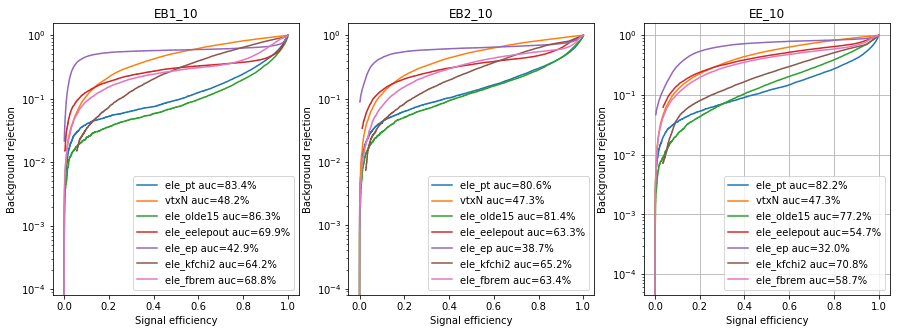

In [19]:
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

for i, df_group in df.groupby("EleMVACats"):
    
    if i < 3:
        continue
    
    df_train = df_group.query("not test")
    df_test = df_group.query("test")
    
    df.columns
    
    ax = axes2[i%3]
    #plot_roc_curve(df_test, "score", ax=ax,color="green", label="your new training (test sample)")
    #plot_roc_curve(df_train, "score", ax=ax, color="green", linestyle='--', label="your new training (train sample)")
    #plot_roc_curve(df_test, "ele_IsMvaNonIsolated", ax=ax)
    #plot_roc_curve(df_test, "ele_IsMvaIsolated", ax=ax)
    plot_roc_curve(df_test, "ele_pt", ax=ax)
    plot_roc_curve(df_test, "vtxN", ax=ax)
    plot_roc_curve(df_test, "ele_olde15", ax=ax)
    plot_roc_curve(df_test, "ele_eelepout", ax=ax)
    #plot_roc_curve(df_test, "ele_expected_inner_hits", ax=ax)
    plot_roc_curve(df_test, "ele_ep", ax=ax)
    plot_roc_curve(df_test, "ele_kfchi2", ax=ax)
    plot_roc_curve(df_test, "ele_fbrem", ax=ax)
    
    #features_barrel = ["ele_fbrem", "ele_deltaetain", "ele_deltaphiin", "ele_oldsigmaietaieta", 
     #              "ele_oldhe", "ele_ep", "ele_olde15", "ele_eelepout",
      #             "ele_kfchi2", "ele_kfhits", "ele_expected_inner_hits", "vtxN", "ele_convDist","ele_convDcot"]
    
    #plot_roc_curve(df_test, "Fall17IsoV2RawVals", ax=ax)
    
    ax.set_title(category_titles[i])
    ax.legend()
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
plt.grid()   
plt.show()